In [1]:
import os
from skimage import io
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import shutil
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
batch_size = 32
img_height = 300
img_width = 200

In [3]:
num_classes = 3
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 7, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [4]:
def get_model_name():
    import time
    run=time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return run

In [5]:
recall=tf.keras.metrics.Recall(class_id=None)

In [6]:
root_logdir=os.path.join(os.curdir, 'my_logs')

In [7]:
def get_run_logdir():
    import time
    run_id=time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [8]:
run_logdir=get_run_logdir()
model_name=get_model_name()

In [9]:
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-5 less"
        min_delta=1e-5,
        # "no longer improving" being further defined as "for at least 30 epochs"
        patience=30,
        verbose=1,), 
    keras.callbacks.TensorBoard(run_logdir,
                              histogram_freq=2,
                              write_graph=True,
                              write_images=True),
    keras.callbacks.ModelCheckpoint(filepath='models/'+model_name ,save_best_only=True)]

In [10]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=30, width_shift_range=0.3,
    height_shift_range=0.3, fill_mode='nearest', cval=0.0,
    horizontal_flip=True, vertical_flip=False)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator()

In [11]:
train_generator = train_datagen.flow_from_directory(
        'plants/train',
        target_size=(300, 200),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        'plants/val',
        target_size=(300, 200),
        batch_size=32,
        class_mode='categorical')

Found 1968 images belonging to 3 classes.
Found 422 images belonging to 3 classes.


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[recall])

In [13]:
epochs=300
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs,
    callbacks=[callbacks])

Epoch 1/300
 1/62 [..............................] - ETA: 0s - loss: 1.1104 - recall: 0.0000e+00WARNING:tensorflow:From /Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
62/62 [==============================] - ETA: 0s - loss: 0.8624 - recall: 0.6453WARNING:tensorflow:From /Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets writt

62/62 [==============================] - 174s 3s/step - loss: 0.7056 - recall: 0.6768 - val_loss: 0.7068 - val_recall: 0.6043
Epoch 38/300
62/62 [==============================] - 170s 3s/step - loss: 0.6974 - recall: 0.6560 - val_loss: 0.6943 - val_recall: 0.6374
Epoch 39/300
62/62 [==============================] - 179s 3s/step - loss: 0.6886 - recall: 0.6682 - val_loss: 0.7121 - val_recall: 0.6730
Epoch 40/300
62/62 [==============================] - 173s 3s/step - loss: 0.7086 - recall: 0.6601 - val_loss: 0.6773 - val_recall: 0.6540
Epoch 41/300
62/62 [==============================] - 169s 3s/step - loss: 0.6955 - recall: 0.6682 - val_loss: 0.6981 - val_recall: 0.6635
Epoch 42/300
62/62 [==============================] - 173s 3s/step - loss: 0.6851 - recall: 0.6789 - val_loss: 0.6966 - val_recall: 0.6991
Epoch 43/300
62/62 [==============================] - 173s 3s/step - loss: 0.6812 - recall: 0.6707 - val_loss: 0.6833 - val_recall: 0.6445
Epoch 44/300
62/62 [====================

Epoch 88/300
62/62 [==============================] - 165s 3s/step - loss: 0.5881 - recall: 0.7231 - val_loss: 0.5849 - val_recall: 0.7133
Epoch 89/300
62/62 [==============================] - 164s 3s/step - loss: 0.5714 - recall: 0.7287 - val_loss: 0.6006 - val_recall: 0.7346
Epoch 90/300
62/62 [==============================] - 164s 3s/step - loss: 0.5753 - recall: 0.7368 - val_loss: 0.6128 - val_recall: 0.6896
Epoch 91/300
62/62 [==============================] - 164s 3s/step - loss: 0.5581 - recall: 0.7292 - val_loss: 0.6196 - val_recall: 0.6919
Epoch 92/300
62/62 [==============================] - 165s 3s/step - loss: 0.5387 - recall: 0.7398 - val_loss: 0.5810 - val_recall: 0.7536
Epoch 93/300
62/62 [==============================] - 164s 3s/step - loss: 0.5744 - recall: 0.7429 - val_loss: 0.5840 - val_recall: 0.7180
Epoch 94/300
62/62 [==============================] - 164s 3s/step - loss: 0.5354 - recall: 0.7353 - val_loss: 0.5929 - val_recall: 0.7109
Epoch 95/300
62/62 [=======

62/62 [==============================] - 164s 3s/step - loss: 0.4105 - recall: 0.8095 - val_loss: 0.6037 - val_recall: 0.7275
Epoch 141/300
62/62 [==============================] - 165s 3s/step - loss: 0.4382 - recall: 0.8074 - val_loss: 0.5763 - val_recall: 0.7630
Epoch 142/300
62/62 [==============================] - 163s 3s/step - loss: 0.4165 - recall: 0.8232 - val_loss: 0.6510 - val_recall: 0.7346
Epoch 143/300
62/62 [==============================] - 164s 3s/step - loss: 0.4230 - recall: 0.8125 - val_loss: 0.5951 - val_recall: 0.7393
Epoch 00143: early stopping


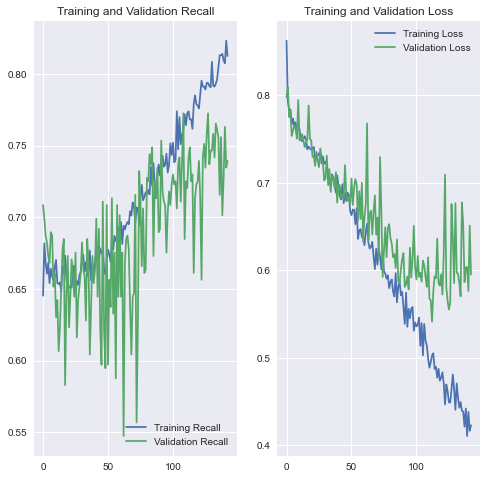

In [23]:
plt.style.use('seaborn')
acc = history.history['recall']
val_acc = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Recall')
plt.plot(epochs_range, val_acc, label='Validation Recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('graphs/simplemodel128x2aug.png', bbox_inches='tight')
plt.show()

In [15]:
test_generator = test_datagen.flow_from_directory(
        'plants/test',
        target_size=(300, 200),
        batch_size=16,
        shuffle=False,
        class_mode='categorical')

Found 424 images belonging to 3 classes.


In [16]:
ben_plants = os.listdir('plants/test/Benign_Plants')
ivy=os.listdir('plants/test/Poison_Ivy/')
oak=os.listdir('plants/test/Poison_Oak')

In [17]:
y_true=pd.DataFrame()
for i in range(len(ben_plants)):
    num=pd.Series([1,0,0])
    y_true= y_true.append(num, ignore_index=True)
for j in range(len(ivy)):
    num=pd.Series([0,1,0])
    y_true= y_true.append(num, ignore_index=True)
for k in range(len(oak)):
    num=pd.Series([0,0,1])
    y_true= y_true.append(num, ignore_index=True)

In [18]:
y_hat=(model.predict(test_generator, verbose=1))

27/27 [==============================] - 15s 558ms/step


In [19]:
y_pred=np.argmax(y_hat, axis=1)
y_s=np.argmax(np.array(y_true), axis=1)
c_mat=confusion_matrix(y_s, y_pred)
percent=(c_mat/(np.sum(c_mat, axis=1).reshape(3,-1))).reshape(3,3)

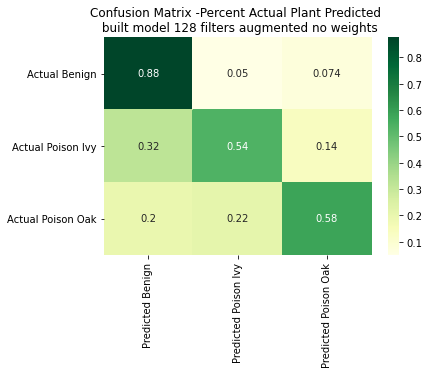

In [22]:
predicted_cat=['Predicted Benign', 'Predicted Poison Ivy', 'Predicted Poison Oak']
real_cat=['Actual Benign', 'Actual Poison Ivy', 'Actual Poison Oak']
sns.heatmap(percent, annot=percent, cmap='YlGn', 
            xticklabels=predicted_cat, 
            yticklabels=real_cat).set_title('Confusion Matrix -Percent Actual Plant Predicted \n built model 128 filters augmented no weights');
plt.savefig('graphs/simplemodel128x2_2aug.png', bbox_inches='tight')